In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")


import data_preprocessing as dp
import metrics
import genetic_algorithm as ga
import matplotlib.pyplot as plt 

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_excel('/content/final_data.xlsx')
data.head()

,Unnamed: 0,Actual duration**1 x Team size**1,Actual duration**1 x Dedicated team members**1,Actual duration**1 x Development environment adequacy**1 x 11-20**1,Dedicated team members**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,User resistance**1 x Project manager**1 x 21-30**1,Contract maturity**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Requirment stability**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Actual duration**1 x 21-30**1 x Inaccurate requirements specifications and required the re-analysis of the software requirements**1,Dedicated team members**1 x Tool availability**1 x Technical stability**1,...,Actual duration**1 x Economic instability impact**1 x Dedicated team members**1,Technical stability**1 x 21-30**1 x Accurate requirements specifications used to develop the software system**1,Actual duration**1 x Dedicated team members**1 x Accurate requirements specifications used to develop the software system**1,Users stability**1 x Dedicated team members**1 x 1-5**1,Object points**1 x Project manager**1 x >500**1,Team size**1 x Developer**1 x >500**1,Users stability**1 x Dedicated team members**1 x Accurate requirements specifications used to develop the software system**1,Developer incentives policy**1 x Dedicated team members**1 x Team cohesion**1,Requirment stability**1 x Tool availability**1 x 11-20**1,Actual effort
0,0,18.0,18.0,0,0,0.0,0,0.0,0,42,...,18.0,0,18.0,0.0,0,6,11.333333,96,0.000000,3168.0
1,1,9.0,9.0,0,0,0.0,0,0.0,0,24,...,27.0,0,0.0,0.0,0,0,0.000000,108,0.000000,1584.0
2,2,30.0,30.0,0,0,0.0,0,0.0,0,48,...,60.0,0,0.0,0.0,0,0,0.000000,180,0.000000,5280.0
3,3,36.0,24.0,6,0,0.0,0,0.0,0,32,...,24.0,0,24.0,0.0,0,0,20.000000,16,10.031746,5280.0
4,4,216.0,216.0,24,0,0.0,0,0.0,0,36,...,648.0,0,216.0,0.0,0,0,17.000000,54,18.603175,38016.0


In [ ]:
target = data['Actual effort']
X = data.drop(['Unnamed: 0', 'Actual effort'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 24)

In [ ]:
X_train, X_test = pd.DataFrame(X_train, columns = X.columns), pd.DataFrame(X_test, columns = X.columns)

In [ ]:
scaler, X_train = dp.scaling_numerical_data(X_train.columns, X_train)
X_test = scaler.transform(X_test)

In [ ]:
mmre = make_scorer(metrics.mean_magnitude_of_relative_error)
mae = make_scorer(metrics.mean_absolute_error)
pred = make_scorer(metrics.pred)
mre = make_scorer(metrics.magnitude_relative_error)

## Cross Validation score

### 10K fold 

In [ ]:
r2_ = cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37))
mae_ = cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = mae)
mmre_ = np.abs(cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = mmre))
pred_ = cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(10, shuffle=True, random_state = 37), scoring = pred)

In [ ]:
print('10k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('10k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('10k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('10k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

10k fold cross validation r2 score 0.8870472101999575, std 0.13105191202083785
10k fold cross validation mean absolute error 1864.7436805555558, std 1514.1203397891154
10k fold cross validation mean magnitude of relative error 0.22243655580587837, std 0.05142455181381492
10k fold cross validation pred of 25% 0.7861111111111111, std 0.10415740699584819


### 5K fold 

In [ ]:
r2_ = cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37))
mae_ = cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mae)
mmre_ = np.abs(cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mmre))
pred_ = cross_val_score(RandomForestRegressor(random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = pred)

In [ ]:
print('5k fold cross validation r2 score {}, std {}'.format(r2_.mean(), r2_.std()))
print('5k fold cross validation mean absolute error {}, std {}'.format(mae_.mean(), mae_.std()))
print('5k fold cross validation mean magnitude of relative error {}, std {}'.format(mmre_.mean(), mmre_.std()))
print('5k fold cross validation pred of 25% {}, std {}'.format(pred_.mean(), pred_.std()))

5k fold cross validation r2 score 0.8769382665170055, std 0.14284235009077323
5k fold cross validation mean absolute error 1857.3901176470586, std 964.2481100907686
5k fold cross validation mean magnitude of relative error 0.23336127797304534, std 0.05881854870574125
5k fold cross validation pred of 25% 0.7279411764705882, std 0.08549671678675665


In [ ]:
rf_model = RandomForestRegressor(random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

### Metrics

In [ ]:
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.963975,0.899441
MAE,728.315238,1950.468056
MMRE,0.080575,0.230401
PRED (0.25),0.940476,0.694444


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


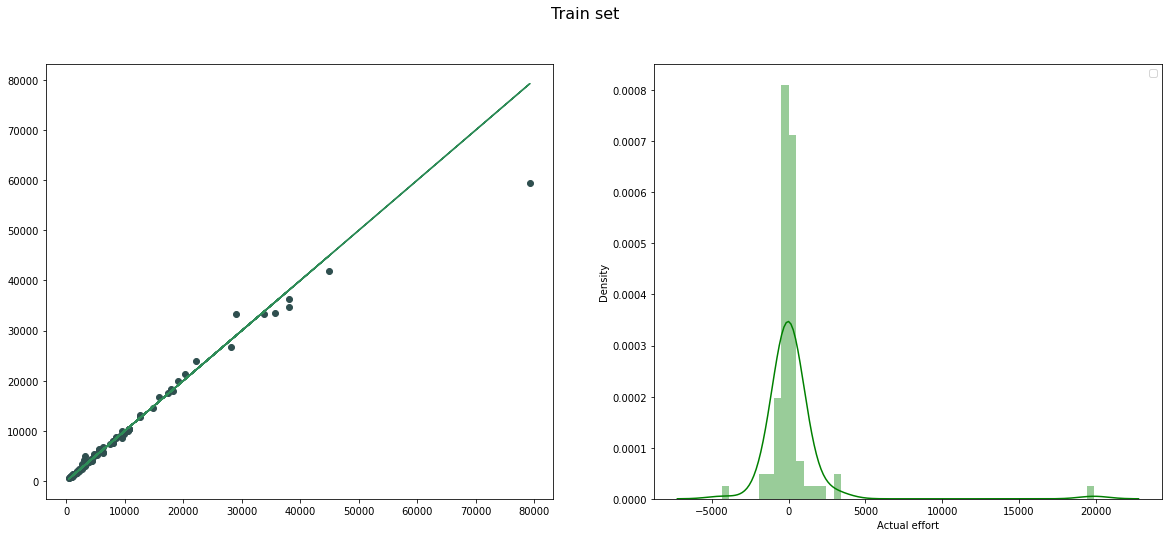

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


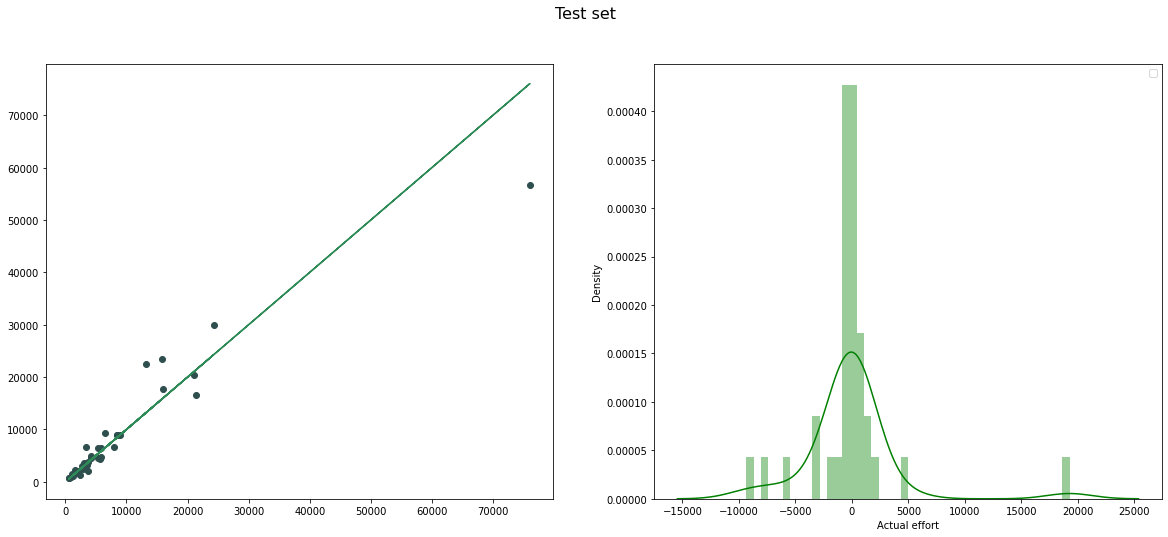

In [ ]:
metrics.plot_predictions(y_train, train_predictions, (20, 8), 'Train set')
metrics.plot_predictions(y_test, test_predictions, (20, 8), 'Test set')

# Hyperparamters optimization

In [ ]:
parameters = {'n_estimators': np.linspace(1, 250, 250).astype(np.int), 'criterion': ['squared_error', 'absolute_error', 'poisson'],
              'max_depth': np.linspace(1, 20, 20).astype(np.int), 'min_samples_split': np.linspace(2, 10, 9).astype(np.int),
              'min_samples_leaf': np.linspace(1, 10, 10).astype(np.int), 'max_features': ['sqrt', 'log2', None],
              'bootstrap': [True, False]}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [ ]:
optimizer = ga.GeneticAlgorithm(RandomForestRegressor(random_state = 0), parameters, X_train, y_train, 6, 0.999, 120, mutation_number = 2)

In [ ]:
best_parameters = optimizer.evolution()

In [ ]:
best_parameters[0]

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 11,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 220}

In [ ]:
r2 = cross_val_score(RandomForestRegressor(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37))
mae =  cross_val_score(RandomForestRegressor(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mae)
mmre = cross_val_score(RandomForestRegressor(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = mmre)
pred  = cross_val_score(RandomForestRegressor(**best_parameters[0], random_state = 0), X_train, y_train, cv = KFold(5, shuffle=True, random_state = 37), scoring = pred)

In [ ]:
print('5k fold cross validation r2 score {}, {}'.format(r2.mean(), r2.std()))
print('5k fold cross validation mean absolute error: {}, {}'.format(mae.mean(), mae.std()))
print('5k fold cross validation mean magnitude of relative error: {}, {}'.format(mmre.mean(), mmre.std()))
print('5k fold cross validation pred of 25%: {}, {}'.format(pred.mean(), pred.std()))

5k fold cross validation r2 score 0.8891589855913139, 0.15019198348106114
5k fold cross validation mean absolute error: 1702.334411764706, 1034.8469584725372
5k fold cross validation mean magnitude of relative error: 0.22237595119146075, 0.06034010679449126
5k fold cross validation pred of 25%: 0.7286764705882353, 0.13606716487235773


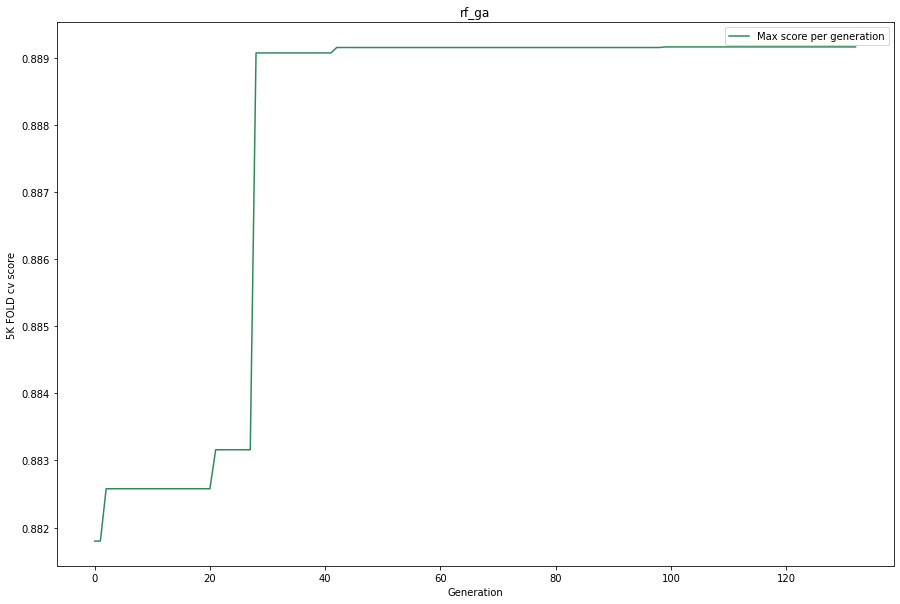

<Figure size 432x288 with 0 Axes>

In [ ]:
optimizer.plot_generations_scores('rf_ga')

In [ ]:
best_parameters[0]

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 11,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 220}

In [ ]:
rf_model = RandomForestRegressor(**best_parameters[0], random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=11,
                      max_features=None, n_estimators=220, random_state=0)

In [ ]:
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
metrics.scores_DataFrame(y_train, y_test, train_predictions, test_predictions)

,Train score,Test score
r2_score,0.962544,0.925385
MAE,724.066667,1519.857639
MMRE,0.079579,0.206044
PRED (0.25),0.940476,0.722222


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


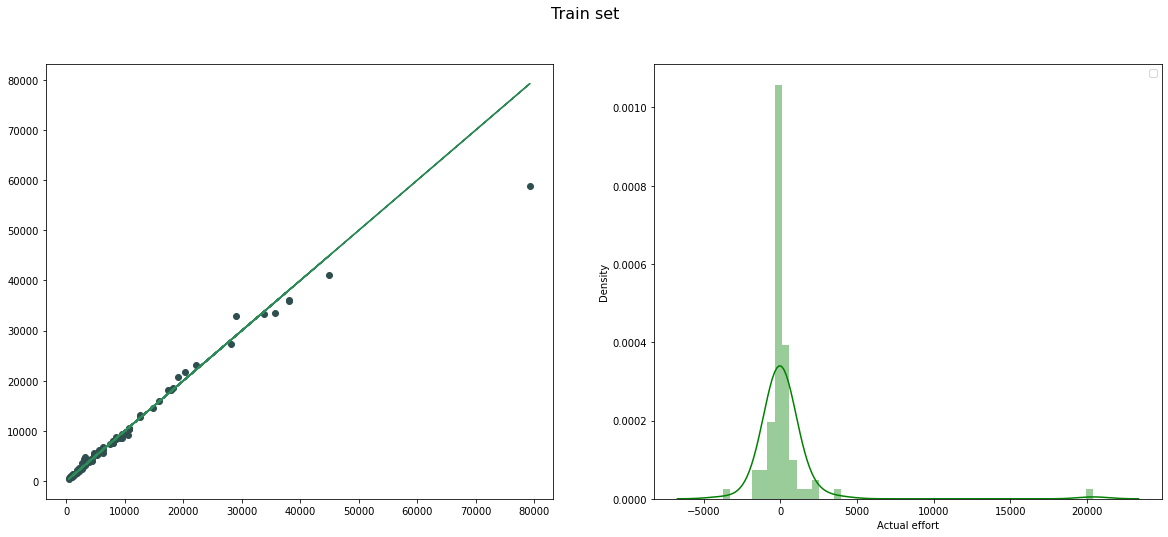

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


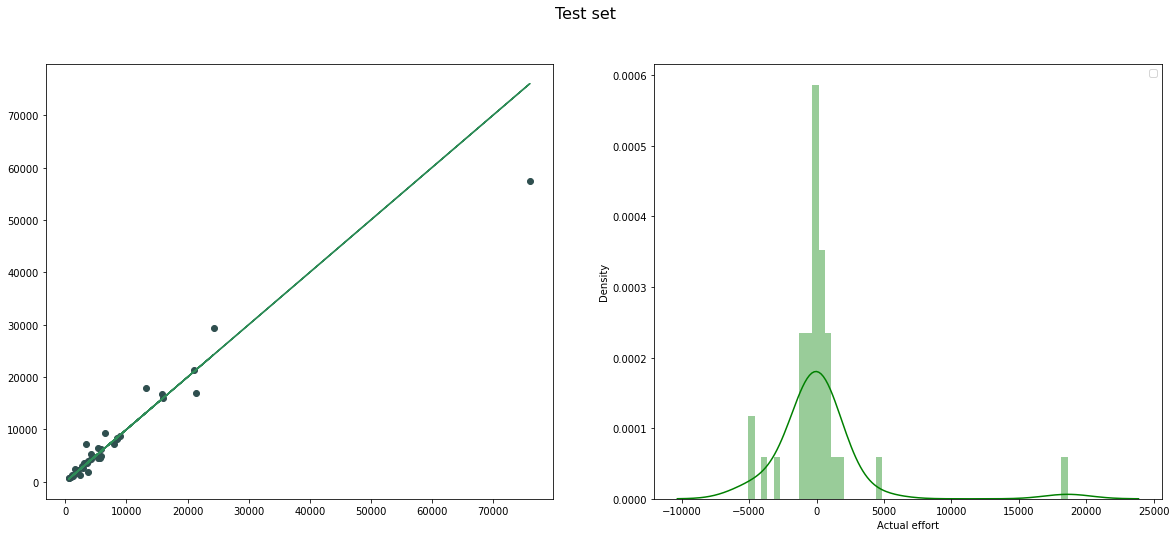

In [ ]:
metrics.plot_predictions(y_train, train_predictions, (20, 8), 'Train set')
metrics.plot_predictions(y_test, test_predictions, (20, 8), 'Test set')

In [ ]:
def plot_generations_scores(title = ''):
    scores = optimizer.get_scores()
    fig = plt.figure(figsize = (15, 10))
    plt.plot(scores, c = 'seagreen', label = 'Max score per generation')
    plt.xlabel('Generation')
    plt.ylabel('5K FOLD cv score')
    plt.title(title)
    plt.legend()
    plt.show()
    return fig

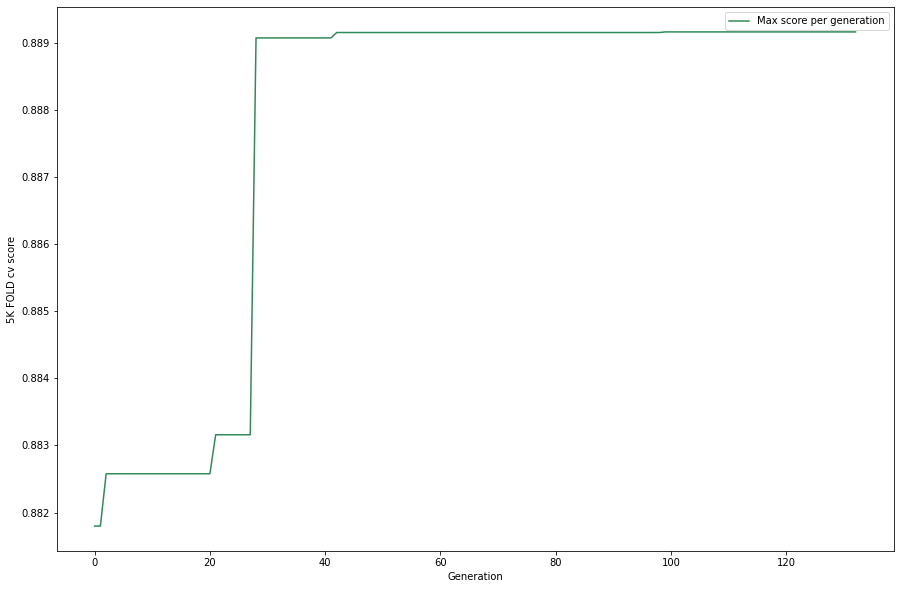

In [ ]:
fig = plot_generations_scores('')

In [ ]:
fig.savefig('/content/rf_ga.pdf')